El presente análisis exploratorio de datos (EDA) tiene como objetivo examinar la información contenida en la base de datos de candidatos, identificando patrones, inconsistencias y distribuciones clave que puedan aportar valor en la toma de decisiones del proceso de selección.

The purpose of this exploratory data analysis (EDA) is to examine the information contained in the candidate database, identifying key patterns, inconsistencies and distributions that may provide value in decision-making in the selection process.

 # Setting the environment

In [1]:
import sys
sys.path.append('../config')  # Agregar la ruta a la carpeta config

# Importing libraries and modules

Se importaron librerías esenciales como pandas, matplotlib.pyplot, seaborn, sqlalchemy, entre otras. Estas herramientas permiten manipular datos, generar visualizaciones y conectar con bases de datos.

Essential libraries such as pandas, matplotlib.pyplot, seaborn, sqlalchemy, among others, were imported. These tools allow data manipulation, visualisations and connection to databases.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  
from sqlalchemy import text
from conexion_db import get_engine
from sqlalchemy import Column, Integer, String
from sqlalchemy.orm import declarative_base 
import numpy as np
import textwrap

# Connection with PostgreSQL

Se estableció una conexión a una base de datos PostgreSQL utilizando sqlalchemy.create_engine(). Esto facilita la extracción de datos de manera eficiente y estructurada, garantizando que los datos sean obtenidos sin inconsistencias ni pérdidas de información.

A connection to a PostgreSQL database was established using sqlalchemy.create_engine(). This facilitates the extraction of data in an efficient and structured manner, ensuring that data is obtained without inconsistencies or loss of information.

In [3]:
engine = get_engine()

try:
    with engine.connect() as connection:
        print("✅ Conexión exitosa a PostgreSQL")
except Exception as e:
    print("❌ Error de conexión:", e)

✅ Conexión exitosa a PostgreSQL


# Read data from PostgreSQL

Se ejecutó una consulta SQL para obtener información de la tabla candidates, cargando los datos en un DataFrame de pandas para su posterior análisis. Se validó que los datos extraídos correspondieran a los criterios establecidos y no presentaran duplicados.

A SQL query was executed to obtain information from the candidates table, loading the data into a pandas DataFrame for further analysis. It was validated that the extracted data corresponded to the established criteria and did not present duplicates.

In [4]:
df = pd.read_sql("SELECT * FROM traffic_accidents ", engine)
df

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6


# Data preparation

Se transformó la columna application_date al formato datetime, permitiendo realizar operaciones temporales como análisis de tendencias, filtrado por rango de fechas y cálculo de diferencias de tiempo entre eventos.

The application_date column was transformed to datetime format, allowing temporal operations such as trend analysis, filtering by date range, and calculating time differences between events.

In [6]:
df["crash_date"] = pd.to_datetime(df["crash_date"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
df

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,2023-07-29 13:00:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,2023-08-13 00:11:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,2021-12-09 10:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,2023-08-09 19:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,2023-08-19 14:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,2023-09-13 13:08:00,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,2023-07-18 14:10:00,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,2019-10-23 13:32:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,2020-06-01 15:23:00,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6


In [26]:
# Extraer año, mes, día y hora
df['crash_year'] = df['crash_date'].dt.year
df['crash_month'] = df['crash_date'].dt.month
df['crash_day'] = df['crash_date'].dt.day
df['crash_hour'] = df['crash_date'].dt.hour

# Data understanding

# Data columns' info

Se utilizó df.info() para revisar la estructura de los datos, identificando el número de registros, los tipos de datos de cada columna y la presencia de valores nulos. 

df.info() was used to review the data structure, identifying the number of records, the data types in each column, and the presence of null values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     209306 non-null  datetime64[ns]
 1   traffic_control_device         209306 non-null  object        
 2   weather_condition              209306 non-null  object        
 3   lighting_condition             209306 non-null  object        
 4   first_crash_type               209306 non-null  object        
 5   trafficway_type                209306 non-null  object        
 6   alignment                      209306 non-null  object        
 7   roadway_surface_cond           209306 non-null  object        
 8   road_defect                    209306 non-null  object        
 9   crash_type                     209306 non-null  object        
 10  intersection_related_i         209306 non-null  object        
 11  

# Reviewing if there's any null values

Se analizó la cantidad de valores faltantes en cada columna utilizando df.isnull().sum(), lo que permitió detectar datos incompletos que podrían afectar el análisis y  nos dimos cuenta que no hay valores nulos. 

The number of missing values ​​in each column was analyzed using df.isnull().sum(), which allowed us to detect incomplete data that could affect the analysis and we realized that there are no null values.

In [8]:
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:")
valores_nulos


Valores nulos por columna:


crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

# Counting the unique values in each column

Se realizó un análisis de valores únicos en variables clave utilizando df.nunique(). Este análisis permite identificar la diversidad dentro de cada columna y posibles valores redundantes. Se observó que algunas variables tienen una gran cantidad de valores únicos, lo que sugiere que podrían ser útiles en modelos predictivos o análisis categóricos más detallados.

A unique value analysis was performed on key variables using df.nunique(). This analysis allows to identify diversity within each column and possible redundant values. Some variables were observed to have a large number of unique values, suggesting that they could be useful in predictive models or more detailed categorical analysis.

In [9]:
valores_unicos = df.nunique()
print("Valores únicos por columna:")
print(valores_unicos)

Valores únicos por columna:
crash_date                       189087
traffic_control_device               19
weather_condition                    12
lighting_condition                    6
first_crash_type                     18
trafficway_type                      20
alignment                             6
roadway_surface_cond                  7
road_defect                           7
crash_type                            2
intersection_related_i                2
damage                                3
prim_contributory_cause              40
num_units                            11
most_severe_injury                    5
injuries_total                       19
injuries_fatal                        4
injuries_incapacitating               8
injuries_non_incapacitating          19
injuries_reported_not_evident        13
injuries_no_indication               39
crash_hour                           24
crash_day_of_week                     7
crash_month                          12
dtype: int64

# Detección de Primeros Nombres Duplicados

Se identificaron posibles duplicados en los primeros nombres de los candidatos con df['first_name'].duplicated().sum(). Esto permitió determinar si existen registros repetidos que podrían afectar la calidad del análisis. Se detectaron algunos registros duplicados en nombres, lo que sugiere la necesidad de validar si corresponden a registros legítimos o errores en la base de datos.

Possible duplicates in the candidates' first names were identified using df['first_name'].duplicated().sum(). This allowed us to determine whether there are repeated records that could affect the quality of the analysis. Some duplicate records were detected in names, suggesting the need to validate whether they correspond to legitimate records or errors in the database.

In [10]:
duplicated_first_name = df.loc[df.duplicated(subset=['damage'], keep=False)]
duplicated_first_name["damage"].value_counts()

damage
OVER $1,500      147313
$501 - $1,500     41210
$500 OR LESS      20783
Name: count, dtype: int64

# Resumen Estadístico

La función df.describe() permitió obtener un resumen estadístico de las variables numéricas, identificando tendencias generales, valores atípicos y dispersión de los datos. Se observó que algunas variables tienen una alta variabilidad, lo que sugiere la necesidad de un análisis más profundo para determinar su impacto en la selección de candidatos.

The df.describe() function provided a statistical summary of the numerical variables, identifying general trends, outliers and data dispersion. Some variables were found to have high variability, suggesting the need for further analysis to determine their impact on candidate selection.

In [11]:
df.describe()

,crash_date,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2020-12-08 23:26:35.213801984,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
min,2013-03-03 16:48:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2018-12-03 10:18:45,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2020-12-19 16:39:00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2023-01-08 02:33:45,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,2025-01-18 00:17:00,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000
std,NaN,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593


In [16]:
# Obtener estadísticas descriptivas de variables categóricas
stats_cat = df.describe(include=["object"])

stats_cat

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,most_severe_injury
count,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306
unique,19,12,6,18,20,6,7,7,2,2,3,40,5
top,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY
freq,123944,164700,134109,64157,77753,204590,155905,171730,117376,199324,147313,58316,154789


Se generó un conteo de ocurrencias de combinaciones de puntajes (code_challenge_score y technical_interview_score). Este análisis permite identificar las puntuaciones más frecuentes entre los candidatos.

A count of the occurrences of combinations of scores (code_challenge_score and technical_interview_score) was generated. This analysis allows identifying the most frequent scores among candidates.

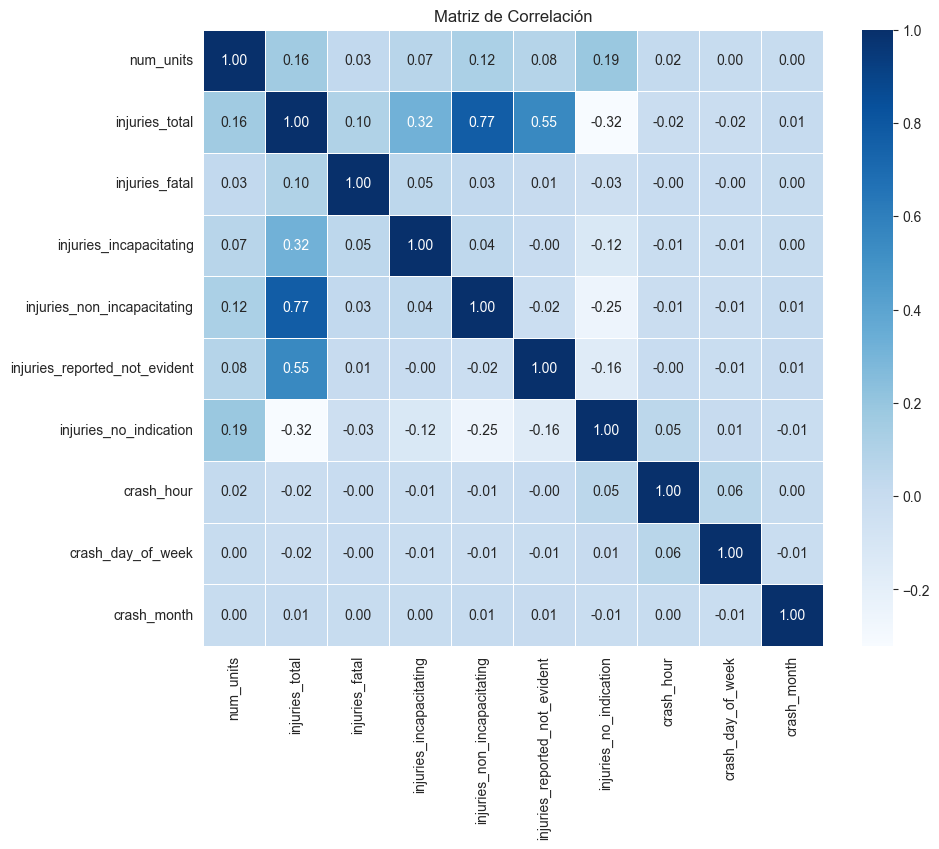

In [19]:
# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()



Se analizó la distribución de tecnologías más comunes en los candidatos, destacando aquellas con mayor frecuencia. 

The distribution of the most common technologies among the candidates was analyzed, highlighting those with the highest frequency.

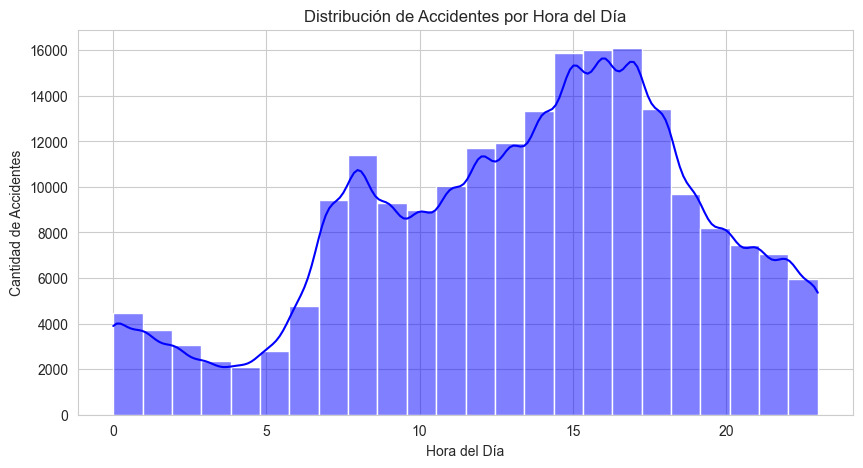

In [20]:
# Configuración de estilo
sns.set_style("whitegrid")

# Histograma de la cantidad de accidentes por hora
plt.figure(figsize=(10, 5))
sns.histplot(df['crash_hour'], bins=24, kde=True, color='blue')
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad de Accidentes")
plt.title("Distribución de Accidentes por Hora del Día")
plt.show()


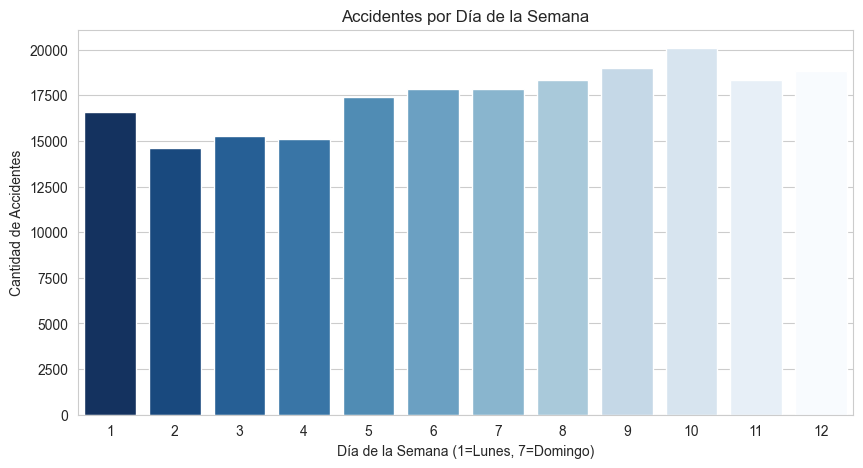

In [23]:
# Histograma de la cantidad de accidentes por día de la semana
plt.figure(figsize=(10, 5))
sns.countplot(x="crash_month", data=df, hue="crash_month", palette="Blues_r", legend=False)
plt.xlabel("Día de la Semana (1=Lunes, 7=Domingo)")
plt.ylabel("Cantidad de Accidentes")
plt.title("Accidentes por Día de la Semana")
plt.show()


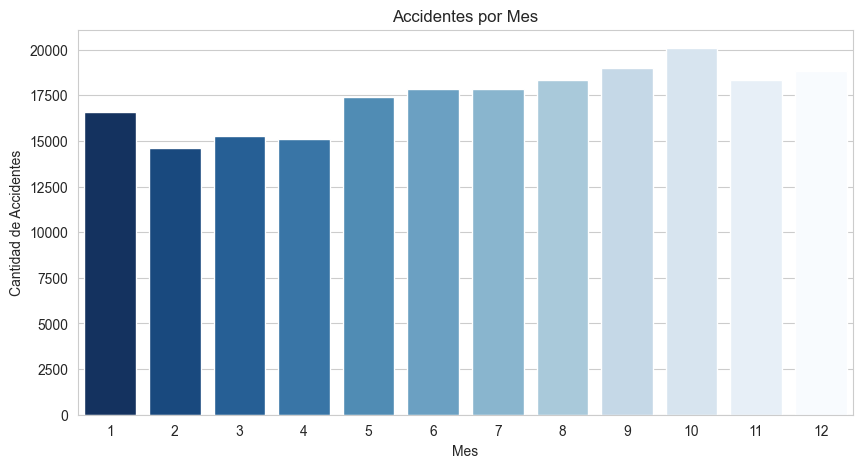

In [24]:

# Histograma de la cantidad de accidentes por mes
plt.figure(figsize=(10, 5))
sns.countplot(x="crash_month", data=df, hue="crash_month", palette="Blues_r", legend=False)
plt.xlabel("Mes")
plt.ylabel("Cantidad de Accidentes")
plt.title("Accidentes por Mes")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_31940\3220762609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="weather_condition", order=df['weather_condition'].value_counts().index, palette="Oranges_r")


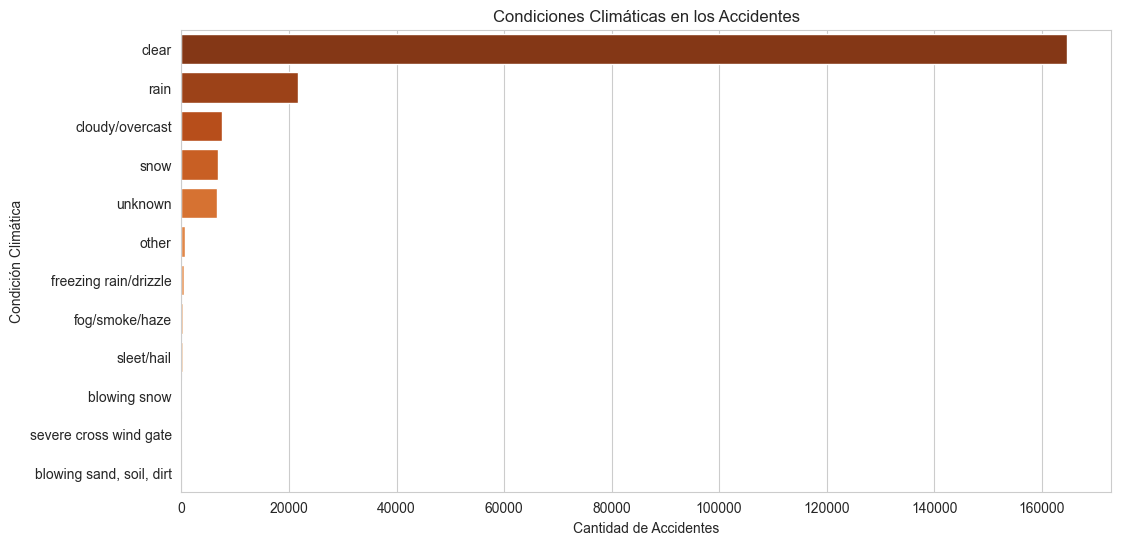

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="weather_condition", order=df['weather_condition'].value_counts().index, palette="Oranges_r")
plt.title("Condiciones Climáticas en los Accidentes")
plt.xlabel("Cantidad de Accidentes")
plt.ylabel("Condición Climática")
plt.show()




Se identificaron los países con mayor número de candidatos y se analizó su distribución. A través del gráfico de pastel, se visualizaron las proporciones relativas de cada país, mientras que el gráfico de barras permitió comparar las cantidades exactas. Este análisis ayuda a detectar posibles concentraciones de candidatos en ciertas regiones y a evaluar la diversidad del proceso de reclutamiento.

The countries with the highest number of candidates were identified and their distribution was analysed. The pie chart showed the relative proportions of each country, while the bar chart made it possible to compare the exact numbers. This analysis helps to detect possible concentrations of candidates in certain regions and to assess the diversity of the recruitment process.

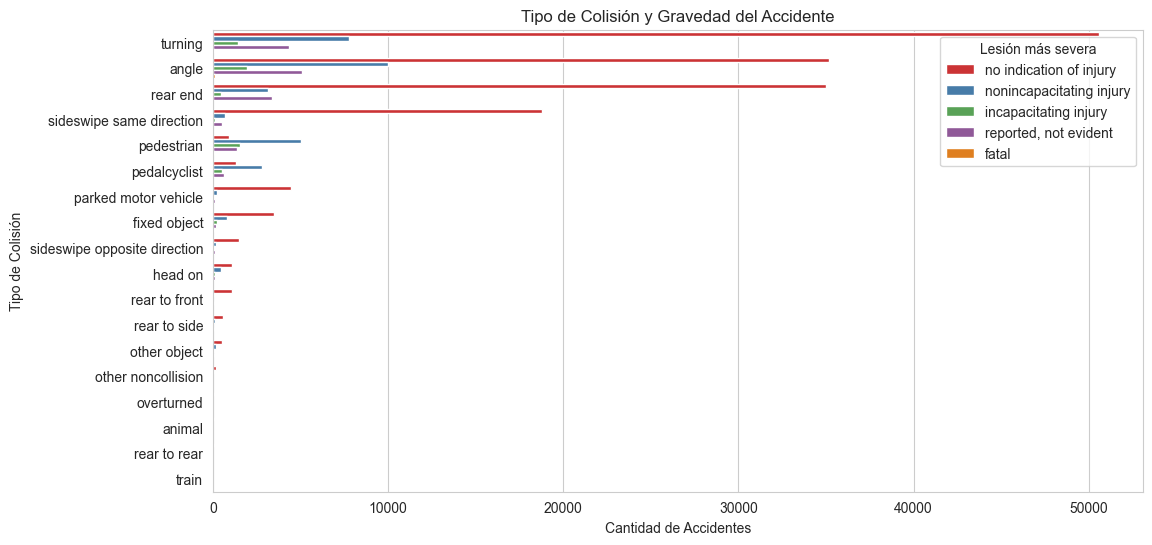

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="first_crash_type", hue="most_severe_injury", order=df['first_crash_type'].value_counts().index, palette="Set1")
plt.title("Tipo de Colisión y Gravedad del Accidente")
plt.xlabel("Cantidad de Accidentes")
plt.ylabel("Tipo de Colisión")
plt.legend(title="Lesión más severa")
plt.show()





C:\Users\Acer\AppData\Local\Temp\ipykernel_31940\2888165827.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=collision_counts.values, y=collision_counts.index, palette="Reds_r")


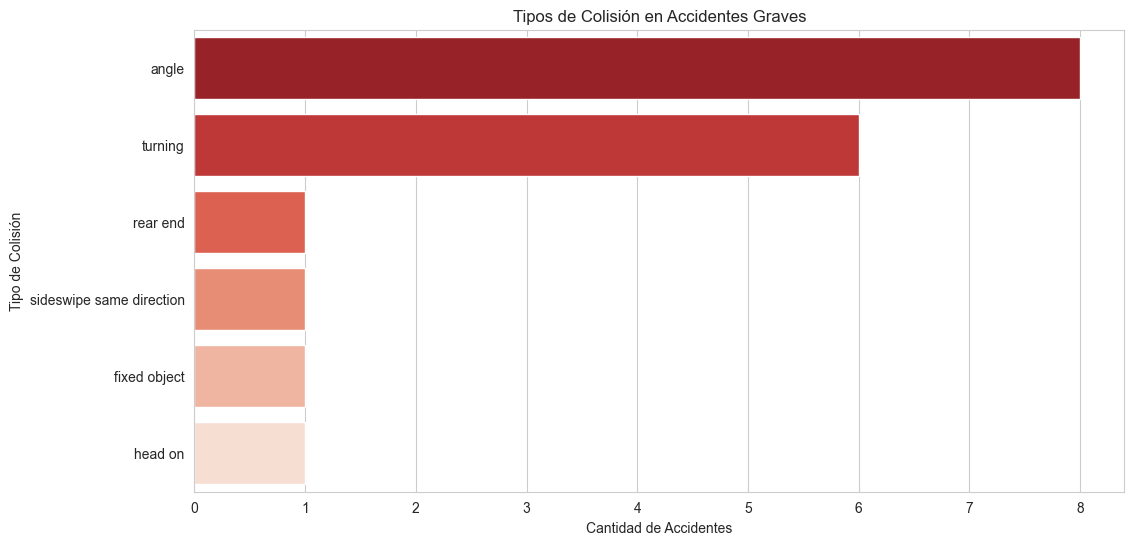

In [33]:
# Filtrar accidentes con más de 10 lesiones
high_injury_accidents = df[df["injuries_total"] > 10]

# Contar tipos de colisión en accidentes graves
collision_counts = high_injury_accidents["first_crash_type"].value_counts()

# Visualizar
plt.figure(figsize=(12, 6))
sns.barplot(x=collision_counts.values, y=collision_counts.index, palette="Reds_r")
plt.title("Tipos de Colisión en Accidentes Graves")
plt.xlabel("Cantidad de Accidentes")
plt.ylabel("Tipo de Colisión")
plt.show()



# conclution 

Este análisis exploratorio proporciona una visión integral del proceso de selección, permitiendo detectar patrones y oportunidades de mejora. Con esta información, se pueden optimizar estrategias de contratación y mejorar la eficiencia en la evaluación de candidatos. 

This exploratory analysis provides a comprehensive view of the selection process, allowing patterns and opportunities for improvement to be detected. With this information, hiring strategies can be optimized and candidate evaluation efficiency can be improved.